# 16_snp_invocab

4/9/21

check if vocabl selected regions ar ein any SNPs associated with any disease (ld expansion)


In [110]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pybedtools

In [85]:
vocab_regions_files = glob.glob('../data/processed/fig4_modelling/vocab_sum_final/vocab_instances_df_filt_*csv')
vocab_regions_files


['../data/processed/fig4_modelling/vocab_sum_final/vocab_instances_df_filt_MM.csv',
 '../data/processed/fig4_modelling/vocab_sum_final/vocab_instances_df_filt_SCC.csv',
 '../data/processed/fig4_modelling/vocab_sum_final/vocab_instances_df_filt_Colon.csv',
 '../data/processed/fig4_modelling/vocab_sum_final/vocab_instances_df_filt_Melanocytes.csv',
 '../data/processed/fig4_modelling/vocab_sum_final/vocab_instances_df_filt_GDSD6.csv',
 '../data/processed/fig4_modelling/vocab_sum_final/vocab_instances_df_filt_GM12878.csv']

In [86]:
def get_snp_vocab(snp_bed):
    snp_vocab_all = pd.DataFrame()
    for file in vocab_regions_files:
        tissue = os.path.basename(file).split('_')[-1].split('.')[0]
        print(tissue)
        vocab_regions_df = pd.read_csv(file)
        vocab_regions_df1 = vocab_regions_df[['chr','vocab1_start','vocab1_stop','vocab1','vocab_pair']]
        vocab_regions_df1.columns = ['chr','start','stop','vocab','vocab_pair']
        vocab_regions_df2 = vocab_regions_df[['chr','vocab1_start','vocab1_stop','vocab1','vocab_pair']]
        vocab_regions_df2.columns = ['chr','start','stop','vocab','vocab_pair']
        vocab_regions_df = pd.concat([vocab_regions_df1, vocab_regions_df2])
        vocab_regions_bed = pybedtools.BedTool.from_dataframe(vocab_regions_df)
        intersect_bed = vocab_regions_bed.intersect(snp_bed, wa=True, wb=True)
        print(len(intersect_bed))
        if len(intersect_bed)>0:
            intersect_df = intersect_bed.to_dataframe().drop_duplicates()
            print(intersect_df.shape)
            intersect_df['tissue'] = tissue
            snp_vocab_all = pd.concat([snp_vocab_all, intersect_df])

    snp_vocab_all.columns = ['chr_vocab','start_vocab','stop_vocab','tf_name','vocab_pair','chr_snp','start_snp','stop_snp','Linked_SNP','tissue']
    print(snp_vocab_all.shape)
    return snp_vocab_all

# Try 1: older version of eQTL linked snp filtered by DHS peaks (28 hits)
Jan 2019 vs Nov 2018 15 --> 28 hits

In [134]:
# snp_df = pd.read_csv('../data/external/cis_eQTLs_all_re.txt',sep='\t')


snp_df = pd.read_csv('../data/external/eQTL-linked-index-SNP-DHS-disease-IndexP-Jan102019.txt',sep='\t')
snp_bed_df = snp_df[['Chr','Position','Linked_SNP']]
snp_bed_df['stop'] = snp_bed_df.Position+1
snp_bed_df = snp_bed_df[['Chr','Position','stop','Linked_SNP']]
snp_bed_df.columns = ['chr','start','stop','name']



snp_bed = pybedtools.BedTool.from_dataframe(snp_bed_df)
print(snp_df.shape)
display(snp_df[:5])

snp_vocab_all = get_snp_vocab(snp_bed).drop_duplicates()
print(snp_vocab_all.shape)

snp_vocab_all = snp_vocab_all.merge(snp_df[['Linked_SNP','Index_SNP','Disease','DHS_tissue','eGene','eQTL_tissue']]).drop_duplicates()
snp_vocab_all[-40:]#.columns


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(244635, 11)


,Linked_SNP,Chr,Position,Ref,Alt,Index_SNP,Disease,DHS_tissue,eGene,eQTL_tissue,Pval
0,rs881361,chr11,78128047,C/G,G,rs2373115,Alzheimer Dementia,astrocyte_of_the_cerebellum,NaN,NaN,1.000000e-10
1,rs71630754,chr5,96126938,G/A,A,rs17482078,Behcet’s Disease,astrocyte_of_the_cerebellum,NaN,NaN,5.000000e-11
2,rs73229160,chr12,121273732,C/T,T,rs73226260,type 2 diabetes,astrocyte_of_the_cerebellum,NaN,NaN,NaN
3,rs2227575,chr10,75677840,C,A,rs2675669,Psoriasis,astrocyte_of_the_cerebellum,NaN,NaN,4.000000e-11
4,rs3851053,chr10,81918582,G,A,rs1953600,Sarcoidosis,astrocyte_of_the_cerebellum,NaN,NaN,1.000000e-06


MM
0
SCC
294
(13, 9)
Colon
224
(9, 9)
Melanocytes
68
(1, 9)
GDSD6
64
(2, 9)
GM12878
74
(3, 9)
(28, 10)
(28, 10)


,chr_vocab,start_vocab,stop_vocab,tf_name,vocab_pair,chr_snp,start_snp,stop_snp,Linked_SNP,tissue,Index_SNP,Disease,DHS_tissue,eGene,eQTL_tissue
265,chr14,69253364,69253377,MAFK,KLF5::MAFK,chr14,69253364,69253365,rs12434551,GDSD6,"rs4902647,rs2236262",Multiple Sclerosis,T-cell,NaN,NaN
266,chr14,69253364,69253377,MAFK,KLF5::MAFK,chr14,69253364,69253365,rs12434551,GDSD6,"rs4902647,rs2236262",Multiple Sclerosis,thymus,NaN,NaN
267,chr14,69253364,69253377,MAFK,KLF5::MAFK,chr14,69253364,69253365,rs12434551,GDSD6,"rs4902647,rs2236262",Multiple Sclerosis,astrocyte_of_the_cerebellum,ZFP36L1,Crohn Disease
268,chr14,23289048,23289065,PLAG1,IRF4::PLAG1,chr14,23289056,23289057,rs17122779,GM12878,rs17122772,type 2 diabetes,astrocyte_of_the_hippocampus,NaN,NaN
269,chr14,23289048,23289065,PLAG1,IRF4::PLAG1,chr14,23289056,23289057,rs17122779,GM12878,rs17122772,type 2 diabetes,astrocyte_of_the_spinal_cord,NaN,NaN
270,chr14,23289048,23289065,PLAG1,IRF4::PLAG1,chr14,23289056,23289057,rs17122779,GM12878,rs17122772,type 2 diabetes,astrocyte,NaN,NaN
271,chr14,23289048,23289065,PLAG1,IRF4::PLAG1,chr14,23289056,23289057,rs17122779,GM12878,rs17122772,type 2 diabetes,B_cell,NaN,NaN
272,chr14,23289048,23289065,PLAG1,IRF4::PLAG1,chr14,23289056,23289057,rs17122779,GM12878,rs17122772,type 2 diabetes,bipolar_neuron,NaN,NaN
273,chr14,23289048,23289065,PLAG1,IRF4::PLAG1,chr14,23289056,23289057,rs17122779,GM12878,rs17122772,type 2 diabetes,CD14-positive_monocyte,NaN,NaN
274,chr14,23289048,23289065,PLAG1,IRF4::PLAG1,chr14,23289056,23289057,rs17122779,GM12878,rs17122772,type 2 diabetes,CD1c-positive_myeloid_dendritic_cell,NaN,NaN


In [84]:
# # these are the ones we actually tested DO NOT RERUN

# snp_vocab_all[['chr_vocab', 'start_vocab', 'stop_vocab', 'tf_name', 'vocab_pair',
#        'chr_snp', 'start_snp', 'stop_snp', 'Linked_SNP', 'tissue']].drop_duplicates()

,chr_vocab,start_vocab,stop_vocab,tf_name,vocab_pair,chr_snp,start_snp,stop_snp,Linked_SNP,tissue
0,chr22,50342708,50342729,SP1,NR2F1::SP1,chr22,50342728,50342729,rs28573373,SCC
3,chr14,69253364,69253380,MAFG,KLF5::MAFG,chr14,69253364,69253365,rs12434551,GDSD6
19,chr14,69253364,69253377,MAFK,KLF5::MAFK,chr14,69253364,69253365,rs12434551,GDSD6
35,chr14,23289048,23289065,PLAG1,IRF4::PLAG1,chr14,23289056,23289057,rs17122779,GM12878


In [77]:
snp_vocab_all.to_csv('../data/processed/snp_motifs/snp_vocab_all_wdhs_egene.csv')

foray into actual stuff
these are the ones we actually tested apparently





chr14	69253364	69253380	MAFG	KLF5::MAFG	chr14	69253364	69253365	rs12434551	GDSD6


5498	KLF5::MAFG	86	59	chr14	69253364	69253450	69253340	69253474	MAFG	69253364	69253380	KLF5	69253439	69253450	GDSD6	loop_loop	2	KLF5::MAFG+GDSD6+2	0	TRUE	scrA_B_seq	CTTCGGAAGAGGCCTGGTGGAATACGCCTATAGTGATAGCGTCCCCAAAACTTCCTGGGTGTAAAGGAACCAAAGGCAAGTGAGCTGCAAATAGCAATCTCTGCCTCTCCCCAAATAAATCCTCCCAAGGCTCAC	KLF5::MAFG+GDSD6+2+scrA_B

MAFG was the one with the snp rs12434551 init (GDSD6)


35	chr14	23289048	23289065	PLAG1	IRF4::PLAG1	chr14	23289056	23289057	rs17122779	GM12878


1:30
10440	IRF4::PLAG1	75	44	chr14	23288990	23289065	23288960	23289094	IRF4	23288990	23289004	PLAG1	23289048	23289065	GM12878	loop_loop	2	IRF4::PLAG1+GM12878+2	0	TRUE	A_scrB_seq	TTGACTCTGAGGAGCAGAAAAAGCAGAGGGTAACGGGGACTGAAATGGAAAACAGGAAAACACATGTGTGACTCTGGCCGGCAGCGGAGGCCGGAGGACGCGGGGGGTGGAGCTGGGACTGCCTGGTCAGACCCA	IRF4::PLAG1+GM12878+2+A_scrB

chr14	23289048	23289065	PLAG1	IRF4::PLAG1	chr14	23289056	23289057	rs17122779	GM12878


and the second one PLAG1 was the one with the SNP rs17122779 (GM12878)

In [101]:
mpra_counts = pd.read_csv('../../miseq/mpraanalyze_results/dk_norm/count_matrix_df_normlog.csv')
mpra_counts

,Unnamed: 0,A431_1,A431_2,A431_3,COLO_1,COLO_2,COLO_3,Colon_1,Colon_2,Colon_3,GM_1,GM_2,GM_3,KCD6_1,KCD6_2,KCD6_3,MC_1,MC_2,MC_3
0,EGR2::KLF4+GDSD6+2+A_scrB.1,20.181985,21.847290,20.604372,19.185192,19.608388,18.947695,20.764059,19.858356,20.315505,18.857948,20.072790,19.092132,20.258890,20.541317,20.055335,19.314158,18.561481,19.000013
1,ARID5B::NFE2L1+MM+10+scrA_B.7,13.927348,15.433229,13.764840,13.836016,15.034963,15.645585,13.961022,13.327211,13.844572,14.035983,15.224607,13.637971,13.755063,15.014631,15.735773,14.426197,13.509355,14.038168
2,NR2F1::THAP1+Colon+7+scrA_B.4,17.085906,17.934684,17.185754,17.754429,17.611633,19.256348,17.666106,17.292538,17.686104,17.051239,17.916488,17.220584,17.547214,17.360469,19.445749,17.707158,17.673472,17.740783
3,IRF8::MYBL2+GM12878+6+scrA_B.1,19.921669,18.467420,17.683608,18.023949,18.362249,19.472233,18.073797,18.153811,19.600108,19.221196,17.942702,17.282091,17.903691,18.101058,19.417121,17.907781,17.930040,19.547534
4,SP3::TFAP2C+SCC+8+A_B.4,14.568236,13.067054,12.882863,12.423720,11.936780,12.632239,12.799253,13.221106,12.961302,13.876956,12.815141,12.315450,12.822739,12.092450,12.771620,11.582958,12.287505,11.922066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91961,IKZF1::MYBL2+GM12878+2+A_scrB.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
91962,SP2::THAP1+Colon+6+A_B.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
91963,KLF5::NR2F1+Colon+1+A_B.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
91964,ASCL2::KLF5+GDSD6+4+scrA_scrB.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [124]:
km_df = mpra_counts[mpra_counts['Unnamed: 0'].str.contains('KLF5::MAFG\+GDSD6\+2')].melt('Unnamed: 0')
km_df.columns = ['id','sample','value']
km_df[['vocab_pair','tissue','instance','orient_bar']]= km_df['id'].str.split('+',expand=True)
km_df[['orient','barcode']]= km_df['orient_bar'].str.split('.',expand=True)
km_df[['mpra_tissue','rep']]= km_df['sample'].str.split('_',expand=True)
km_df.sort_values('orient',inplace=True)
km_df

,id,sample,value,vocab_pair,tissue,instance,orient_bar,orient,barcode,mpra_tissue,rep
350,KLF5::MAFG+GDSD6+2+A_B.9,Colon_3,0.000000,KLF5::MAFG,GDSD6,2,A_B.9,A_B,9,Colon,3
341,KLF5::MAFG+GDSD6+2+A_B.1,Colon_3,4.534431,KLF5::MAFG,GDSD6,2,A_B.1,A_B,1,Colon,3
339,KLF5::MAFG+GDSD6+2+A_B.3,Colon_3,2.155507,KLF5::MAFG,GDSD6,2,A_B.3,A_B,3,Colon,3
337,KLF5::MAFG+GDSD6+2+A_B.8,Colon_3,7.106567,KLF5::MAFG,GDSD6,2,A_B.8,A_B,8,Colon,3
335,KLF5::MAFG+GDSD6+2+A_B.6,Colon_3,6.357107,KLF5::MAFG,GDSD6,2,A_B.6,A_B,6,Colon,3
...,...,...,...,...,...,...,...,...,...,...,...
435,KLF5::MAFG+GDSD6+2+scrA_scrB.6,GM_3,8.810637,KLF5::MAFG,GDSD6,2,scrA_scrB.6,scrA_scrB,6,GM,3
67,KLF5::MAFG+GDSD6+2+scrA_scrB.10,A431_2,7.662188,KLF5::MAFG,GDSD6,2,scrA_scrB.10,scrA_scrB,10,A431,2
448,KLF5::MAFG+GDSD6+2+scrA_scrB.4,GM_3,9.564069,KLF5::MAFG,GDSD6,2,scrA_scrB.4,scrA_scrB,4,GM,3
409,KLF5::MAFG+GDSD6+2+scrA_scrB.4,GM_2,9.689042,KLF5::MAFG,GDSD6,2,scrA_scrB.4,scrA_scrB,4,GM,2


Text(0.5, 1.0, 'KLF5::MAFG+GDSD6+2')

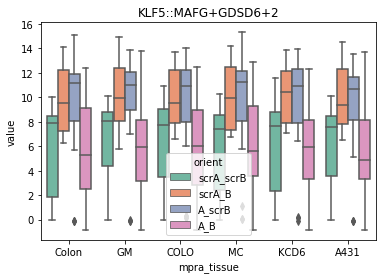

In [125]:
ax = sns.boxplot(x="mpra_tissue", y="value", hue="orient",hue_order = ['scrA_scrB','scrA_B','A_scrB','A_B'],

                   data=km_df, palette="Set2", dodge=True)
ax.set_title('KLF5::MAFG+GDSD6+2')

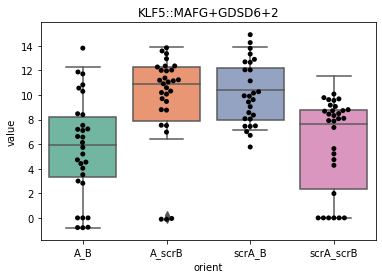

In [136]:
ax = sns.boxplot(x="orient", y="value",# hue="orient",hue_order = ['scrA_scrB','scrA_B','A_scrB','A_B'],

                   data=km_df[km_df.mpra_tissue=='KCD6'], palette="Set2", dodge=True)
sns.swarmplot(x="orient", y="value",ax=ax,# hue="orient",hue_order = ['scrA_scrB','scrA_B','A_scrB','A_B'],
                   data=km_df[km_df.mpra_tissue=='GM'], color='black',dodge=True)
ax.set_title('KLF5::MAFG+GDSD6+2')
plt.savefig('../data/processed/snp_motifs/KLF5::MAFG+GDSD6+2.pdf')

In [121]:
ip_df = mpra_counts[mpra_counts['Unnamed: 0'].str.contains('IRF4::PLAG1\+GM12878\+2')].melt('Unnamed: 0')
ip_df.columns = ['id','sample','value']
ip_df[['vocab_pair','tissue','instance','orient_bar']]= ip_df['id'].str.split('+',expand=True)
ip_df[['orient','barcode']]= ip_df['orient_bar'].str.split('.',expand=True)
ip_df[['mpra_tissue','rep']]= ip_df['sample'].str.split('_',expand=True)
ip_df.sort_values('orient',inplace=True)
ip_df

,id,sample,value,vocab_pair,tissue,instance,orient_bar,orient,barcode,mpra_tissue,rep
359,IRF4::PLAG1+GM12878+2+A_B.8,Colon_3,7.040514,IRF4::PLAG1,GM12878,2,A_B.8,A_B,8,Colon,3
346,IRF4::PLAG1+GM12878+2+A_B.7,Colon_3,10.428097,IRF4::PLAG1,GM12878,2,A_B.7,A_B,7,Colon,3
344,IRF4::PLAG1+GM12878+2+A_B.9,Colon_3,18.541732,IRF4::PLAG1,GM12878,2,A_B.9,A_B,9,Colon,3
334,IRF4::PLAG1+GM12878+2+A_B.1,Colon_3,17.739941,IRF4::PLAG1,GM12878,2,A_B.1,A_B,1,Colon,3
333,IRF4::PLAG1+GM12878+2+A_B.4,Colon_3,15.661477,IRF4::PLAG1,GM12878,2,A_B.4,A_B,4,Colon,3
...,...,...,...,...,...,...,...,...,...,...,...
430,IRF4::PLAG1+GM12878+2+scrA_scrB.8,GM_2,9.942504,IRF4::PLAG1,GM12878,2,scrA_scrB.8,scrA_scrB,8,GM,2
427,IRF4::PLAG1+GM12878+2+scrA_scrB.1,GM_2,10.678992,IRF4::PLAG1,GM12878,2,scrA_scrB.1,scrA_scrB,1,GM,2
73,IRF4::PLAG1+GM12878+2+scrA_scrB.3,A431_2,13.001518,IRF4::PLAG1,GM12878,2,scrA_scrB.3,scrA_scrB,3,A431,2
71,IRF4::PLAG1+GM12878+2+scrA_scrB.9,A431_2,13.141684,IRF4::PLAG1,GM12878,2,scrA_scrB.9,scrA_scrB,9,A431,2


Text(0.5, 1.0, 'IRF4::PLAG1+GM12878+2')

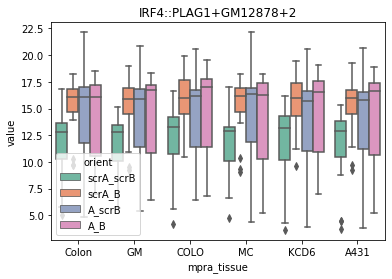

In [122]:
ax = sns.boxplot(x="mpra_tissue", y="value", hue="orient",hue_order = ['scrA_scrB','scrA_B','A_scrB','A_B'],
                   data=ip_df, palette="Set2", dodge=True)
ax.set_title('IRF4::PLAG1+GM12878+2')

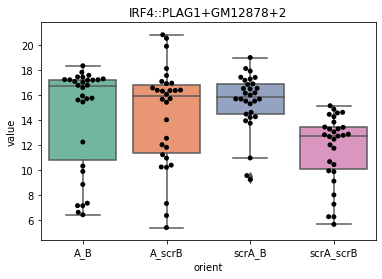

In [137]:
ax = sns.boxplot(x="orient", y="value",# hue="orient",hue_order = ['scrA_scrB','scrA_B','A_scrB','A_B'],

                   data=ip_df[ip_df.mpra_tissue=='GM'], palette="Set2", dodge=True)
sns.swarmplot(x="orient", y="value",ax=ax,# hue="orient",hue_order = ['scrA_scrB','scrA_B','A_scrB','A_B'],
                   data=ip_df[ip_df.mpra_tissue=='GM'], color='black',dodge=True)
ax.set_title('IRF4::PLAG1+GM12878+2')
plt.savefig('../data/processed/snp_motifs/IRF4::PLAG1+GM12878+2.pdf')

# Try 2: snps from cancer stuff but includes all things (28 hits)


In [70]:
snp_df = pd.read_csv('../data/external/GWAS/snp_list_combined.csv',index_col=0)
snp_df.columns = ['Linked_SNP','Chr','Position','disease']
snp_bed_df = snp_df 
snp_bed_df['stop'] = snp_bed_df.Position+1
snp_bed_df = snp_bed_df[['Chr','Position','stop','Linked_SNP']]
snp_bed_df.columns = ['chr','start','stop','name']



snp_bed = pybedtools.BedTool.from_dataframe(snp_bed_df)
print(snp_df.shape)
display(snp_df[:5])


snp_vocab_all = get_snp_vocab(snp_bed)

snp_vocab_all = snp_vocab_all.merge(snp_df[['Linked_SNP','disease']]).drop_duplicates()
print(snp_vocab_all.shape)
snp_vocab_all




(35203, 5)


,Linked_SNP,Chr,Position,disease,stop
0,rs56319043,chr1,44171211,lung,44171212
1,rs2294890,chr1,8086527,brca,8086528
2,rs10494075,chr1,108330356,Thyroid,108330357
3,rs4866783,chr5,44876507,brca,44876508
4,rs75282042,chr5,50735307,brca,50735308


MM
0
SCC
40
(13, 9)
Colon
20
(9, 9)
Melanocytes
4
(1, 9)
GDSD6
4
(2, 9)
GM12878
6
(3, 9)
(28, 10)
(29, 11)


,chr_vocab,start_vocab,stop_vocab,tf_name,vocab_pair,chr_snp,start_snp,stop_snp,Linked_SNP,tissue,disease
0,chr12,123718300,123718309,TFAP2C,KLF16::TFAP2C,chr12,123718301,123718302,rs1727332,SCC,"Schizophrenia,Bipolar,Schizophrenia"
1,chr12,123717687,123717695,ZBTB14,SP1::ZBTB14,chr12,123717689,123717690,rs146239222,SCC,"Schizophrenia,Bipolar,Schizophrenia"
2,chr20,62670349,62670370,MAZ,MAZ::SP1,chr20,62670369,62670370,rs118165004,SCC,Hypertension
3,chr20,62670352,62670373,VEZF1,SP1::VEZF1,chr20,62670369,62670370,rs118165004,SCC,Hypertension
4,chr20,62670354,62670372,ZNF770,SP1::ZNF770,chr20,62670369,62670370,rs118165004,SCC,Hypertension
5,chr22,50342721,50342742,MAZ,MAZ::SP1,chr22,50342728,50342729,rs28573373,SCC,Acne
6,chr22,50342708,50342729,SP1,NR2F1::SP1,chr22,50342728,50342729,rs28573373,SCC,Acne
7,chr22,50342713,50342734,SP2,SP1::SP2,chr22,50342728,50342729,rs28573373,SCC,Acne
8,chr22,50342708,50342729,SP1,SP1::SP4,chr22,50342728,50342729,rs28573373,SCC,Acne
9,chr22,50342728,50342738,ZNF770,SP1::ZNF770,chr22,50342728,50342729,rs28573373,SCC,Acne


# Try 3: noncancer linked snps

In [73]:
snp_loc_df = pd.read_csv('../data/external/GWAS/causalSNP-combined-location.vcf',header=None, sep='\t')
snp_loc_df.columns = ['Chr','Position','Linked_SNP','Ref','Alt']
snp_loc_df['Chr'] = 'chr'+snp_loc_df.Chr.map(str)

snp_df = pd.read_csv('../data/external/GWAS/causalSNP-leadSNP-nonCancer-Oct23.txt',header=None, sep='\t')
snp_df.columns = ['Linked_SNP','beta','Index_SNP','pop','r2','Index_SNP2','disease']
snp_df = snp_df.merge(snp_loc_df, how='inner',on='Linked_SNP')
snp_bed_df = snp_df 
snp_bed_df['stop'] = snp_bed_df.Position+1
snp_bed_df = snp_bed_df[['Chr','Position','stop','Linked_SNP']].drop_duplicates()
snp_bed_df.columns = ['chr','start','stop','name']



# snp_bed = pybedtools.BedTool.from_dataframe(snp_bed_df)
print(snp_df.shape, snp_bed_df.shape)
display(snp_df[:5])


snp_vocab_all = get_snp_vocab(snp_bed).drop_duplicates()

# snp_vocab_all = snp_vocab_all.merge(snp_df[['Linked_SNP']]).drop_duplicates()
print(snp_vocab_all.shape)
snp_vocab_all




(247128, 12) (197497, 4)


,Linked_SNP,beta,Index_SNP,pop,r2,Index_SNP2,disease,Chr,Position,Ref,Alt,stop
0,rs4692978,0.80,rs10021088,OCD,0.8,rs10021088,OCD,chr4,94033638,G,C,94033639
1,rs13107832,0.84,rs10021088,OCD,0.84,rs10021088,OCD,chr4,94052457,T,A,94052458
2,rs28448801,0.92,rs10021088,OCD,0.92,rs10021088,OCD,chr4,94052456,T,C,94052457
3,rs10013748,NaN,rs10013748,OCD,NaN,rs10013748,OCD,chr4,94018593,A,"C,T",94018594
4,rs1030757,NaN,rs1030757,OCD,NaN,rs1030757,OCD,chr4,93697153,C,A,93697154


MM
0
SCC
40
(13, 9)
Colon
20
(9, 9)
Melanocytes
4
(1, 9)
GDSD6
4
(2, 9)
GM12878
6
(3, 9)
(28, 10)
(28, 10)


,chr_vocab,start_vocab,stop_vocab,tf_name,vocab_pair,chr_snp,start_snp,stop_snp,Linked_SNP,tissue
0,chr12,123718300,123718309,TFAP2C,KLF16::TFAP2C,chr12,123718301,123718302,rs1727332,SCC
1,chr12,123717687,123717695,ZBTB14,SP1::ZBTB14,chr12,123717689,123717690,rs146239222,SCC
3,chr20,62670349,62670370,MAZ,MAZ::SP1,chr20,62670369,62670370,rs118165004,SCC
4,chr20,62670352,62670373,VEZF1,SP1::VEZF1,chr20,62670369,62670370,rs118165004,SCC
5,chr20,62670354,62670372,ZNF770,SP1::ZNF770,chr20,62670369,62670370,rs118165004,SCC
6,chr22,50342721,50342742,MAZ,MAZ::SP1,chr22,50342728,50342729,rs28573373,SCC
8,chr22,50342708,50342729,SP1,NR2F1::SP1,chr22,50342728,50342729,rs28573373,SCC
9,chr22,50342713,50342734,SP2,SP1::SP2,chr22,50342728,50342729,rs28573373,SCC
11,chr22,50342708,50342729,SP1,SP1::SP4,chr22,50342728,50342729,rs28573373,SCC
15,chr22,50342728,50342738,ZNF770,SP1::ZNF770,chr22,50342728,50342729,rs28573373,SCC


In [74]:
snp_vocab_all.Linked_SNP.unique().shape

(11,)

In [75]:
snp_vocab_all.to_csv('../data/processed/snp_motifs/snp_vocab_all.csv')